# Introduction

This notebook will attempt to provide intuition into classifier performance metrics (such as precision, recall and ROC curves). It is written in the style of guiding a learner, and therefore includes some thinking prompts before the answers are shown. No memorisation of formulas (such as recall equals true positives over true positives plus false negatives) is required, and is expressly discouraged.

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score, confusion_matrix, roc_curve
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Boring stuff that has to be done + Dataset Description

We use the popular Breast Cancer dataset, primarily for its simplicity so that we can focus on concepts and not the dataset. It comes preloaded with scikit-learn, so loading it up is a cinch.

In [2]:
cancer_data = load_breast_cancer()

The breast cancer dataset has 10 features, and _two classes_

In [3]:
list(cancer_data.target_names)

['malignant', 'benign']

The classifiers we use in order to understand performance metrics will attempt to classify each cell as _malignant_ or _benign_ based on the 10 feature values.

Let's convert the data (which is currently a sklearn bunch object) to a pandas dataframe which are easier to work with...

In [4]:
cancer_df = pd.DataFrame(data=np.c_[cancer_data.data, cancer_data.target], columns=[np.append([cancer_data.feature_names], ["class"])])

...and separate out the feature values (X) and the class labels (Y)...

In [5]:
X = cancer_df[cancer_df.columns[:-1]]
Y = cancer_df[cancer_df.columns[-1]]

... and use 70% of the data as training, 30% as test...

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

# Hands on Precision and Recall

Precision and recall scores are widely used metrics to evaluate classifiers, owing in no small part to their reliability in evaluating classifiers for datasets with an imbalanced number of examples in each class. 

We start off with using the KNN classfier, again due to simplicity as our objective is to learn about accuracy metrics and not to gain the highest accuracy.

In [7]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

Let's first look at the 'recall' metric of the model. The recall metric will measure how many of the positive instances in the dataset our classifier was able to detect. Put another way, out of the instances in the test dataset that are actually positive, how many did our classifier find out (or how many did it _'remember'_ or '_recall_').

The number of True Negative, False Positive, False Negative, True Positive instances have been given below. Try to figure out the recall of the classifier without resorting to any memorized formulae.

In [8]:
tn, fp, fn, tp = confusion_matrix(Y_test, predictions).ravel()
print(tn, fp, fn, tp)

57 6 4 104


How many _actual_ positive instances are there in the test set? This will be the sum of:

- The number of instances the classifier correctly detected as positive (the True Positives(104)) and
- The instances the classifier missed (the False Negatives(4)) which _should_ have been classified as positives

Therefore the recall value is the number of positives the classifier found or 'recalled' (104) divided by the number of actual positives (104+4). Let's print out the recall score as returned by scikit-learn. This should be equal to 104/(104+4)

In [9]:
print('Recall KNN (n=3): ', recall_score(Y_test, predictions))

Recall KNN (n=3):  0.9629629629629629


The precision metric focuses on only the instances that the classifier _thought_ were positive. Precision can be interpreted as measuring the number of instances that were _actually_ positive out of the instances that the classifier _thought_ were positive. 

The number of instances the classifier _thought_ were positive is obviously the sum of:

- The number of instances it correctly thought were positive (True Positives = 104)
- The number of instances it incorrectly thought were positive (False Positives = 6)

The precision metric is the proportion of the correctly identified positives (104) against the total number of instances the classifier thought were positive (104+6). 

Let's print out the precision score as returned by scikit-learn. This should be equal to 104/(104+6)

In [10]:
print('Precision KNN (n=3): ', precision_score(Y_test, predictions))

Precision KNN (n=3):  0.9454545454545454


Now for something that will test understanding. Suppose we have a classifier that classifies **all** instances as positive

In [11]:
all_one_predictions = [1]*len(X_test)

What would the recall value be for this predictor?

In [12]:
print ('Recall: ', recall_score(Y_test, all_one_predictions))

Recall:  1.0


The recall value is 1.0 because this classifier detects all positive instances. It claims that _all_ instances are positive, so of course it is not going to miss any, so it will have perfect recall. 

However this will inevitably result in many instances that are _not_ actually positive being labeled as positive, which will bring down precision. 

In [13]:
print ('Precision: ', precision_score(Y_test, all_one_predictions))

Precision:  0.631578947368421


It might also be illustrative to consider the case where the predictor claims that all instances are negative. 

In [14]:
all_zero_predictions = [0]*len(X_test)
print ('Recall: ', recall_score(Y_test, all_zero_predictions))
print ('Precision: ', precision_score(Y_test, all_zero_predictions))

Recall:  0.0
Precision:  0.0


C:\Users\Pasan.DESKTOP-3IJPFIT\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Recall is zero because the classifier does not claim that _any_ instance is a positive, and therefore misses every actual positive instance. 

Precision is not defined, as precision is the proportion the classifier detected as correctly positive out of all that it thought were positive. Here the classifier does not believe that any instance is positive. Therefore trying to figure out how many it _correctly_ thought were positive does not make too much sense as it did not believe that _any_ sample was positive. 

# ROC Curves

Another popular performance measuring tool for model comparison is ROC curves. ROC curves only make sense for classifiers that output a probability. Therefore let's move on to Decision Trees as our classifier. 

Probabilistic classifiers output a probability for each class. 

In [15]:
model = tree.DecisionTreeClassifier(random_state=42, max_depth=2)
model.fit(X_train, Y_train)
predictions_proba = model.predict_proba(X_test)
print(predictions_proba)

[[0.02173913 0.97826087]
 [0.94964029 0.05035971]
 [0.94964029 0.05035971]
 [0.02173913 0.97826087]
 [0.02173913 0.97826087]
 [0.94964029 0.05035971]
 [0.94964029 0.05035971]
 [0.28571429 0.71428571]
 [0.94964029 0.05035971]
 [0.02173913 0.97826087]
 [0.02173913 0.97826087]
 [0.94964029 0.05035971]
 [0.02173913 0.97826087]
 [0.94964029 0.05035971]
 [0.02173913 0.97826087]
 [0.94964029 0.05035971]
 [0.02173913 0.97826087]
 [0.02173913 0.97826087]
 [0.02173913 0.97826087]
 [0.94964029 0.05035971]
 [0.02173913 0.97826087]
 [0.02173913 0.97826087]
 [0.94964029 0.05035971]
 [0.02173913 0.97826087]
 [0.02173913 0.97826087]
 [0.28571429 0.71428571]
 [0.02173913 0.97826087]
 [0.02173913 0.97826087]
 [0.02173913 0.97826087]
 [0.94964029 0.05035971]
 [0.02173913 0.97826087]
 [0.02173913 0.97826087]
 [0.02173913 0.97826087]
 [0.02173913 0.97826087]
 [0.02173913 0.97826087]
 [0.02173913 0.97826087]
 [0.53333333 0.46666667]
 [0.02173913 0.97826087]
 [0.94964029 0.05035971]
 [0.02173913 0.97826087]


They use a threshold to determine when to place a given instance in the postive class. 

For example scikit-learn uses a default threshold value of 0.5. If the probability output by the classifier for the positive class is greater than 0.5, it would classify that instance as positive, and vice versa. 

In [16]:
predictions = model.predict(X_test)
print(predictions)

[1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0.
 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1.
 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0.
 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1.
 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 0. 1.]


You may compare this output with the probabilities output above, and see the output is 1 whenever the second column has a value > 0.5

Let's generate the class labels ourselves to verify that this is indeed what scikit-learn is doing.

In [17]:
threshold = 0.5
predictions_custom_threshold = [1 if prob[1] > threshold else 0 for prob in predictions_proba]
print(predictions_custom_threshold)

[1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1]


Check if the two prediction lists are equal...

In [18]:
all(predictions == predictions_custom_threshold)

True

and they are!

Look at the probabilities output for the classes earlier and try to guess at which threshold values the predictions would differ (would they differ at 0.6? what about 0.8?)

In [19]:
threshold = 0.8
predictions_custom_threshold = [1 if prob[1] > threshold else 0 for prob in predictions_proba]
all(predictions == predictions_custom_threshold)

False

Given that different decisions are made (about whether to label an instance as a positive class instance or not), the performance metrics would also change. 

For example let's look at the recall values (heads up, you can guess which threshold would result in the higher recall value based on the discussion above)

In [20]:
print('Recall (Threshold = 0.5)', recall_score(Y_test, predictions))
print('Recall (Threshold = 0.8)', recall_score(Y_test, predictions_custom_threshold))


Recall (Threshold = 0.5) 0.9444444444444444
Recall (Threshold = 0.8) 0.8888888888888888


A lower threshold encourages more instances to be classified as positive, which would increase the number of positive instances the classifier finds, which will increase recall. 

Of course, this will result in this low threshold aggressively-positive-finding classifier having a higher proportion of instances it incorrectly thinks are positive.  Therefore, precision is bound to suffer. 

In [21]:
print('Precision (Threshold = 0.5)', precision_score(Y_test, predictions))
print('Precision (Threshold = 0.8)', precision_score(Y_test, predictions_custom_threshold))

Precision (Threshold = 0.5) 0.9444444444444444
Precision (Threshold = 0.8) 0.9795918367346939


We see the Precision when the threshold was at 0.5 is lower than it is at 0.8

## Building our own ROC curves

We now see that the performance metrics of probabilistic classifiers differ based on the threshold at which a sample is treated as a positive class sample. 

ROC curves are useful in probabilistic classifiers since the performance metrics can differ based on this threshold. 

ROC curves are essentially a **plot of the classifier performance at multiple different thresholds.** 

In ROC curves the classifier performance is commonly expressed using the 'True Positive Rate' and the 'False Positive Rate'. 

- The True Positive Rate is the proportion of True Positives to all Actual Positives
- The False Positive Rate is the proportion of False Positives to all Actual Negatives

Let's first calculate the True Positive and False Positive Rates for multiple threshold values.

In [22]:
thresholds = np.linspace(0,1.1,11)
metrics_at_different_thresholds=list()
for threshold in thresholds: #find fp and tp rates at multiple threshold values
    predictions_custom_threshold = [1 if prob[1] > threshold else 0 for prob in predictions_proba]
    
    tn, fp, fn, tp = confusion_matrix(Y_test, predictions_custom_threshold).ravel()
    fp_rate = fp / (tn + fp)
    tp_rate = tp / (tp + fn)
    
    metrics_at_different_thresholds.append((fp_rate, tp_rate))

Let's now plot the True Positive and False Positive pairs we calculated above.

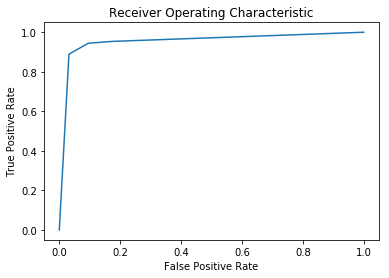

In [23]:
#plot fp, tp rates at multiple threshold values
x = [metrics_at_threshold[0] for metrics_at_threshold in metrics_at_different_thresholds]
y = [metrics_at_threshold[1] for metrics_at_threshold in metrics_at_different_thresholds]

plt.plot(x, y)
plt.title('Receiver Operating Characteristic')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Compare with the ROC curve that is generated for us using scikit-learn...

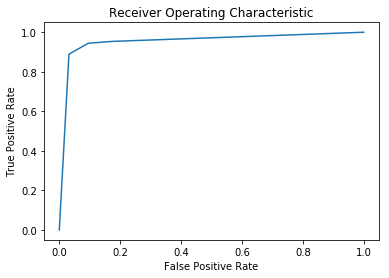

In [24]:
fpr, tpr, thresholds = roc_curve(Y_test, predictions_proba[:,1], pos_label=1)
plt.title('Receiver Operating Characteristic')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot(fpr, tpr)
plt.show()

They are the same. Hopefully studying the code for creating the ROC curve from scratch helped you understand what it actually represents. 

# Where to from here?

Some potential areas to explore:

- Learn about sensitivity and specificity (I like to think of sensitivity as 'positive recall' and specificity as 'negative recall')
- ROC curves for multiple classes and regression problems